# FORD GO BIKE Exploration 
## by Sara Raafat


This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Each trip is anonymized and includes:

Trip Duration (seconds)                                                                                                         
Start Time and Date                                                                                                            
End Time and Date                                                                                                              
Start Station ID                                                                                                              
Start Station Name                                                                                                             
Start Station Latitude                                                                                                         
Start Station Longitude                                                                                                        
End Station ID                                                                                                                 
End Station Name                                                                                                               
End Station Latitude                                                                                                           
End Station Longitude                                                                                                          
Bike ID                                                                                                                         
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201912-baywheels-tripdata.csv')
df.head()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.781010,-122.405666,12085,Customer,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14.0,Clay St at Battery St,37.795001,-122.399970,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363.0,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   start_time               150102 non-null  object 
 2   end_time                 150102 non-null  object 
 3   start_station_id         129083 non-null  float64
 4   start_station_name       129087 non-null  object 
 5   start_station_latitude   150102 non-null  float64
 6   start_station_longitude  150102 non-null  float64
 7   end_station_id           128755 non-null  float64
 8   end_station_name         128757 non-null  object 
 9   end_station_latitude     150102 non-null  float64
 10  end_station_longitude    150102 non-null  float64
 11  bike_id                  150102 non-null  int64  
 12  user_type                150102 non-null  object 
 13  rental_access_method     27681 non-null   object 
dtypes: f

In [4]:
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            21019
start_station_name          21015
start_station_latitude          0
start_station_longitude         0
end_station_id              21347
end_station_name            21345
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       122421
dtype: int64

In [5]:
# Remove rows where start or end station id is null 
df_new = df[(df['start_station_id'].isnull()== False) & (df['end_station_id'].isnull()== False) ]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             125634 non-null  int64  
 1   start_time               125634 non-null  object 
 2   end_time                 125634 non-null  object 
 3   start_station_id         125634 non-null  float64
 4   start_station_name       125634 non-null  object 
 5   start_station_latitude   125634 non-null  float64
 6   start_station_longitude  125634 non-null  float64
 7   end_station_id           125634 non-null  float64
 8   end_station_name         125634 non-null  object 
 9   end_station_latitude     125634 non-null  float64
 10  end_station_longitude    125634 non-null  float64
 11  bike_id                  125634 non-null  int64  
 12  user_type                125634 non-null  object 
 13  rental_access_method     3213 non-null    object 
dtypes: f

In [6]:
#convert start and ed time from string to datetime
df_new['start_time']= pd.to_datetime(df_new['start_time'])
df_new['end_time']= pd.to_datetime(df_new['end_time'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             125634 non-null  int64         
 1   start_time               125634 non-null  datetime64[ns]
 2   end_time                 125634 non-null  datetime64[ns]
 3   start_station_id         125634 non-null  float64       
 4   start_station_name       125634 non-null  object        
 5   start_station_latitude   125634 non-null  float64       
 6   start_station_longitude  125634 non-null  float64       
 7   end_station_id           125634 non-null  float64       
 8   end_station_name         125634 non-null  object        
 9   end_station_latitude     125634 non-null  float64       
 10  end_station_longitude    125634 non-null  float64       
 11  bike_id                  125634 non-null  int64         
 12  user_type       

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_new.duplicated().sum()

0

In [8]:
df_new['start_hour'],df_new['start_month'],df_new['weekday'] = df_new['start_time'].dt.hour, df_new['start_time'].dt.month, df_new['start_time'].dt.day_name()
df_new.head(2)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_hour,start_month,weekday
0,66600,2019-12-31 14:28:50.286,2020-01-01 08:58:51.250,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.78101,-122.405666,12085,Customer,NaN,14,12,Tuesday
1,36526,2019-12-31 21:52:47.762,2020-01-01 08:01:33.932,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.75020,-122.386567,9477,Customer,NaN,21,12,Tuesday


### What is the structure of your dataset?

The dataset 's size is 125634 rows . The dataset contained features about: how long the trip took in seconds
and  start/end date/time for the bike rides and also some info about the stations:the start/end station, the station's name and  location.Also we have some customer data including the bike id and the user type .
There is no duplicates and the rows that has no nfo about the stations were deleted.
I also made new columns for month ,year and day of the ride to make more exploration later.

### What is/are the main feature(s) of interest in your dataset?

I am interested to explore whether trips taken in the weekend are more ?and is there a certain day more prefered than other? what are The average duration of trips?and how the type of user (subscriber,customer) affect the data?Also how the rental access method affect the trips?
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_time,duration_sec and user_type

In [30]:
def log_trans(x,inverse=False):
    """ function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

## Univariate Exploration


### Average duration


(0, 86230)

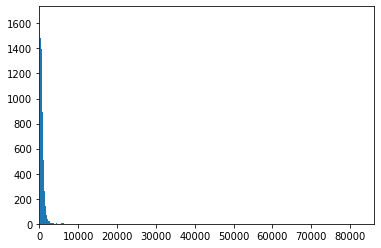

In [9]:
#histogram of duration and the big pin size since it is measure in seconds
binsize=10
bins = np.arange(0, df_new['duration_sec'].max()+binsize, binsize)
plt.hist(data = df_new, x = 'duration_sec', bins = bins)
plt.xlim([0, df_new['duration_sec'].max()])

In [10]:
df_new['duration_sec'].describe()

count    125634.000000
mean        784.006567
std        1828.238272
min          61.000000
25%         365.000000
50%         575.000000
75%         881.000000
max       86230.000000
Name: duration_sec, dtype: float64

(array([   60,   200,   300,   500,   700,   900,  2000, 10000, 20000,
        50000, 90000]),
 <a list of 11 Text xticklabel objects>)

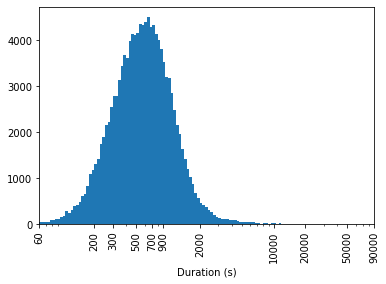

In [11]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_new['duration_sec'].max())+log_binsize, log_binsize)

plt.hist(data = df_new, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim([60,86300])
plt.xticks([60, 200, 300, 500, 700, 900, 2000, 10000, 20000, 50000, 90000], [60, 200, 300, 500, 700, 900, 2000, 10000, 20000, 50000, 90000]);
plt.xlabel('Duration (s)');
plt.xticks(rotation=90)

In [12]:
df_new=df_new[df_new['duration_sec']<1000]
df_new['duration_sec'].describe()

count    101699.000000
mean        512.005379
std         228.260644
min          61.000000
25%         328.000000
50%         489.000000
75%         686.000000
max         999.000000
Name: duration_sec, dtype: float64

>The distribution of the duration was a little right skewed with a long tail.
so i did a log transformation and after it the distrubtion was close to a normal one but with still exsited an outlier at the end so i cleaned it .
The average duration of the trip is about 500 sec.


### User type

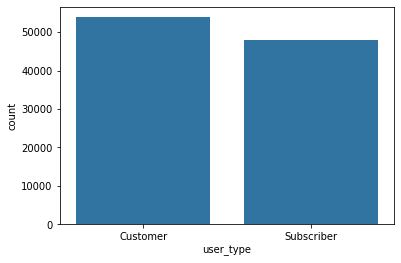

In [13]:
default_color = sb.color_palette()[0]
sb.countplot(data = df_new, x = 'user_type', color = default_color)

>As seen,The number of customer is slightly bigger than that of  sucscribers .

### Time(Month,Day ,hour)

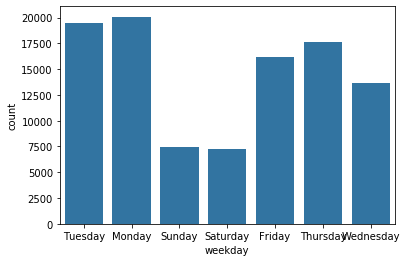

In [14]:
sb.countplot(data = df_new, x = 'weekday', color = default_color)

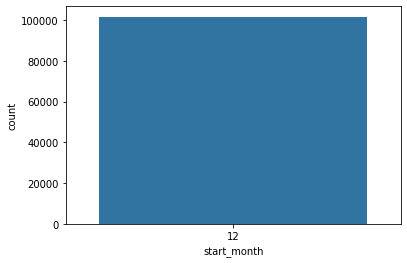

In [15]:
sb.countplot(data = df_new, x = 'start_month', color = default_color)

In [16]:
df_new.drop(['start_month'],inplace=True,axis=1)
df_new.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_hour,weekday
25,781,2019-12-31 23:56:40.324,2020-01-01 00:09:41.545,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,11020,Customer,NaN,23,Tuesday


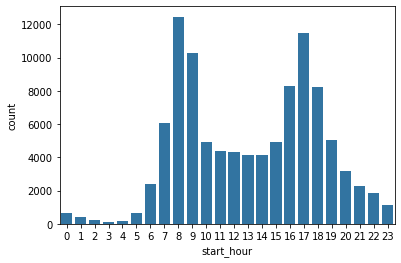

In [17]:
sb.countplot(data = df_new, x = 'start_hour', color = default_color)

>After exploring the exact day,month,hour of trips :

All data was recorded in december 2019 so that's why i dropped the column because it s no longer useful.                       

We see an increase in the number of rides during weekdays compared to weekends(Saturday,Sunday) which makes sense.

We also see that most of the rides start at 8 a.m or 5 p.m ,which are the times where most of people go and return from work.



### Rental access method

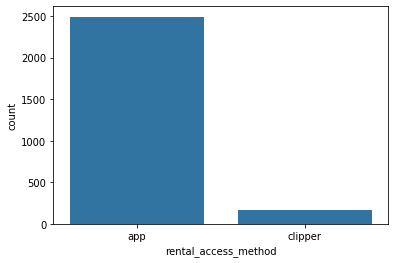

In [18]:
sb.countplot(data = df_new, x = 'rental_access_method', color = default_color)

>The rental access method most used is clearly the app.

## Bivariate Exploration



In [32]:

categoric_vars = ['weekday', 'start_hour', 'user_type','rental_access_method']
df_new['duration_log']=df_new['duration_sec'].apply(log_trans)

### Relation between trip duration and other categorial variables


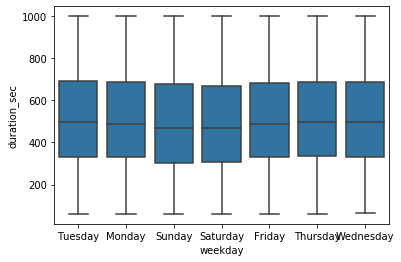

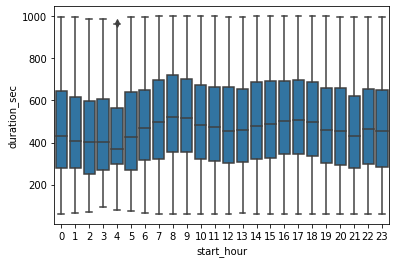

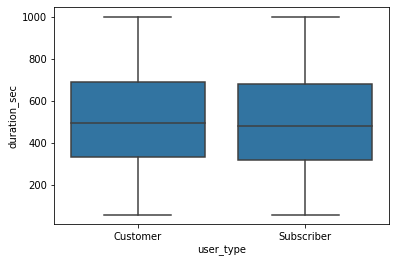

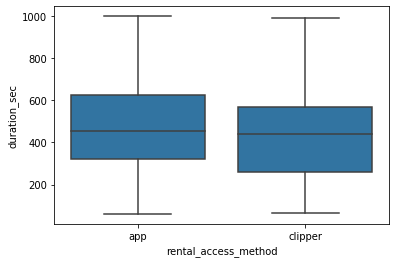

In [34]:
 for var in categoric_vars:
        sb.boxplot(data = df_new, x = var, y = 'duration_sec',color = default_color)
        plt.show()
        

>
###### Bike rides duration on weekends is slightly less than those of weekdays .                                              
###### Bikers with rental method "app" have longer rides compared to  those whose rental method is clipper.                           

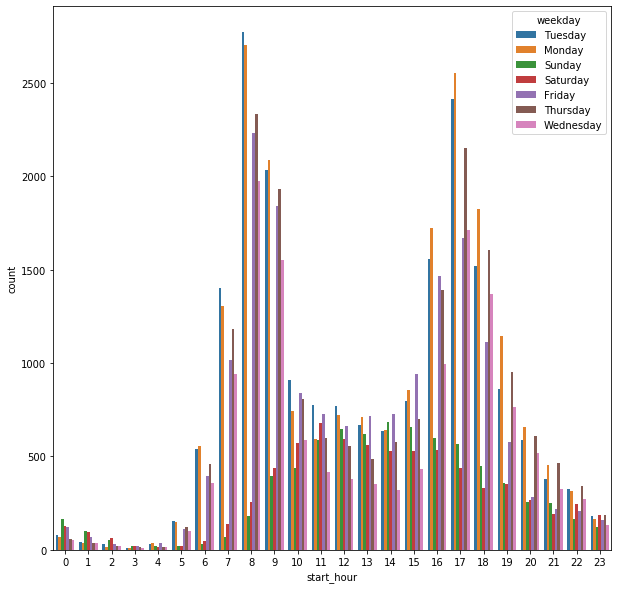

In [21]:
plt.figure(figsize=(10,10))
sb.countplot(data = df_new, x = 'start_hour', hue = 'weekday')


>Tuesday , 8 a.m has the biggest number of rides.


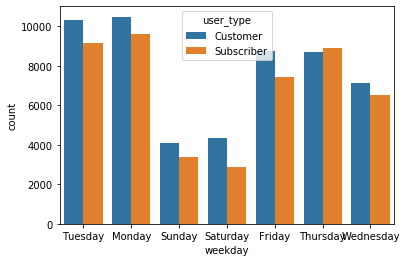

In [29]:
sb.countplot(data = df_new, x = 'weekday', hue = 'user_type');


>Tuesday and Monday has the most rides of both customers and subscribers .

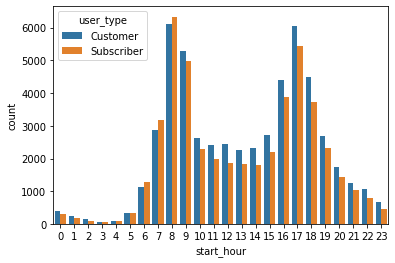

In [35]:
sb.countplot(data = df_new, x = 'start_hour', hue = 'user_type');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bike rides duration on weekends is slightly less than those of weekdays .                                              
 Bikers with rental method "app" have longer rides compared to  those whose rental method is clipper.  
Tuesday , 8 a.m has the biggest number of rides.
Tuesday and Monday has the most rides of both customers and subscribers 


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

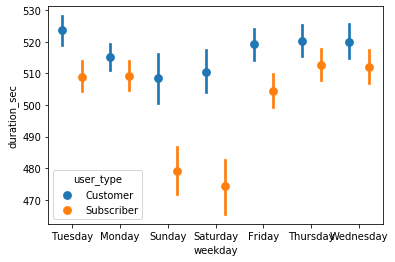

In [41]:
sb.pointplot(data = df_new, x = 'weekday', y = 'duration_sec', hue = 'user_type', linestyles = "", dodge = 0.4)

>We see that customers have longer rides than subscribers.
Subscribres have short rides on weekends compared to other days.

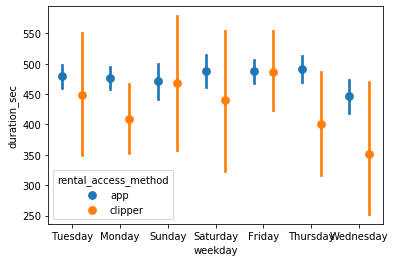

In [56]:
sb.pointplot(data = df_new, x = 'weekday', y = 'duration_sec', hue = 'rental_access_method', linestyles = "", dodge = 0.4)

>Bikers who rent using app show approximately equal trip durations across different days of the week.However those whose rental_access_method is clipper ,their trip durations is widely varied.

Text(0.5, 1, 'Subscriber')

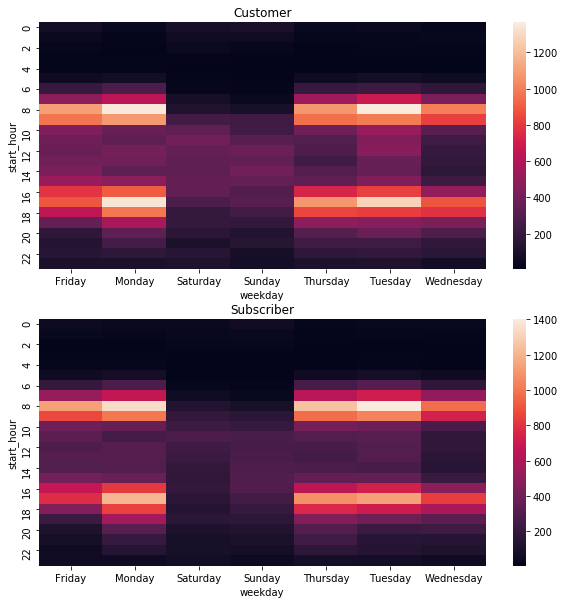

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
customers = df_new[df_new['user_type'] == "Customer"]
ct_counts = customers.groupby(['start_hour', 'weekday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_hour', columns='weekday', values='count')
sb.heatmap(ct_counts)
plt.title('Customer')
plt.subplot(2, 1, 2)
customers = df_new[df_new['user_type'] == "Subscriber"]
ct_counts = customers.groupby(['start_hour', 'weekday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_hour', columns='weekday', values='count')
sb.heatmap(ct_counts)
plt.title('Subscriber')

>Overall both customers and pattern does not differ much in the pattern of thei rides but we notice that on weekends,Customers appear to make rides more than Subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We see that customers have longer rides than subscribers.                                                             Subscribres have short rides on weekends compared to other days.                                                               Bikers who rent using app show approximately equal trip durations across different days of the week.However those whose rental_access_method is clipper ,their trip durations is widelly varied.                                                       Overall both customers and pattern does not differ much in the pattern of thei rides but we notice that on weekends,Customers appear to make rides more than Subscribers.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!